In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Метод Дормана-Принса

In [3]:
mu = 1/82.45
mubar = 1 - mu
r1 = lambda x, y: math.sqrt((x + mu)**2 + y**2)
r2 = lambda x, y: math.sqrt((x - mubar)**2 + y**2)
nu = 0

In [4]:
def f(t, y):
  return np.array([
                   y[1],
                   2*y[3] + y[0] - mubar*(y[0] + mu)/r1(y[0], y[2])**3 - mu*(y[0] - mubar)/r2(y[0], y[2])**3 - nu*y[1],
                   y[3],
                   -2*y[1] + y[2] - mubar*y[2]/r1(y[0], y[2])**3 - mu*y[2]/r2(y[0], y[2])**3 - nu*y[3]
                  ])

In [5]:
y0 = [
      0.994,
      0,
      0,
      -2.00158510637908252240537862224
]

In [6]:
a = 0
b = 25

In [7]:
def rk_dp(a, b, hmax, hmin, tol, y0):
  a21 = (1.0/5.0)
  a31 = 3.0/40.0
  a32 = (9.0/40.0)
  a41 = (44.0/45.0)
  a42 = (-56.0/15.0)
  a43 = (32.0/9.0)
  a51 = (19372.0/6561.0)
  a52 = (-25360.0/2187.0)
  a53 = (64448.0/6561.0)
  a54 = (-212.0/729.0)
  a61 = (9017.0/3168.0)
  a62 = (-355.0/33.0)
  a63 = (46732.0/5247.0)
  a64 = (49.0/176.0)
  a65 = (-5103.0/18656.0)
  a71 = (35.0/384.0)
  a72 = (0.0)
  a73 = (500.0/1113.0)
  a74 = (125.0/192.0)
  a75 = (-2187.0/6784.0)
  a76 = (11.0/84.0)
 
  c2 = (1.0 / 5.0)
  c3 = (3.0 / 10.0)
  c4 = (4.0 / 5.0)
  c5 = (8.0 / 9.0)
  c6 = (1.0)
  c7 = (1.0)
 
  b1 = (35.0/384.0)
  b2 = (0.0)
  b3 = (500.0/1113.0)
  b4 = (125.0/192.0)
  b5 = (-2187.0/6784.0)
  b6 = (11.0/84.0)
  b7 = (0.0)
 
  b1p = (5179.0/57600.0)
  b2p = (0.0)
  b3p = (7571.0/16695.0)
  b4p = (393.0/640.0)
  b5p = (-92097.0/339200.0)
  b6p = (187.0/2100.0)
  b7p = (1.0/40.0)
    
  n = int(np.ceil((b-a)/hmin))
  t = np.zeros(n)
  y = np.array([np.zeros(n) for i in range(len(y0))])
  
  t[0] = a
  y[:, 0] = y0
  h = hmax

  k = np.array([np.zeros(7) for i in range(len(y0))])

  i = 0
  proceed = True

  while i < n:
    k[:, 0] = f(t[i], y[:, i])
    k[:, 1] = f(t[i] + c2*h, y[:, i] + h*(a21*k[:, 0]))
    k[:, 2] = f(t[i] + c3*h, y[:, i] + h*(a31*k[:, 0] + a32*k[:, 1]))
    k[:, 3] = f(t[i] + c4*h, y[:, i] + h*(a41*k[:, 0] + a42*k[:, 1] + a43*k[:, 2]))
    k[:, 4] = f(t[i] + c5*h, y[:, i] + h*(a51*k[:, 0] + a52*k[:, 1] + a53*k[:, 2] + a54*k[:, 3]))
    k[:, 5] = f(t[i] + h, y[:, i] + h*(a61*k[:, 0] + a62*k[:, 1] + a63*k[:, 2] + a64*k[:, 3] + a65*k[:, 4]))
    k[:, 6] = f(t[i] + h, y[:, i] + h*(a71*k[:, 0] + a72*k[:, 1] + a73*k[:, 2] + a74*k[:, 3] + a75*k[:, 4] + a76*k[:, 5]))

    error = np.linalg.norm((b1-b1p)*k[:, 0]+(b3-b3p)*k[:, 2]+(b4-b4p)*k[:, 3]+(b5-b5p)*k[:, 4]+(b6-b6p)*k[:, 5]+(b7-b7p)*k[:, 6])

    if error < tol:
      t[i+1] = t[i] + h
      y[:, i+1] = y[:, i] + h * (b1*k[:, 0]+b3*k[:, 2]+b4*k[:, 3]+b5*k[:, 4]+b6*k[:, 5])
      proceed = True
    else:
      proceed = False

    delta = 0.84 * pow(tol / error, 1/5)

    if delta <= 0.1:
      h *= 0.1
    elif delta >= 4.0:
      h *= 4.0
    else:
      h *= delta 

    if h > hmax:
      h = hmax

    if t[i] >= b:
      break
    elif t[i] + h > b:
      h = b - t[i]
    elif h < hmin:
      print('Minimum step size breached')
      break

    if proceed:
      i += 1

  tres = t[:i]
  yres = y[:, :i]

  return tres, yres

In [8]:
%time t, [x, vx, y, vy] = rk_dp(a, b, 1, 1e-6, 1e-12, y0)

CPU times: user 1.37 s, sys: 335 ms, total: 1.71 s
Wall time: 1.7 s


Text(0, 0.5, 'y')

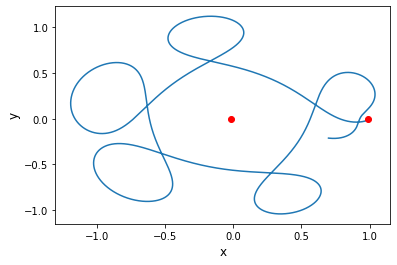

In [9]:
plt.plot(x, y)
plt.plot(-mu, 0, 'ro')
plt.plot(mubar, 0, 'ro')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

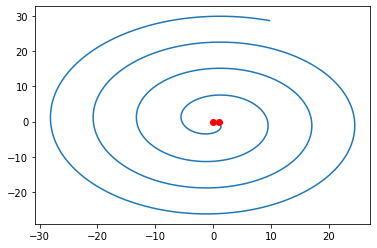

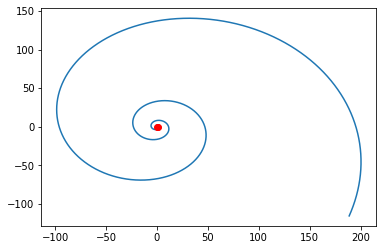

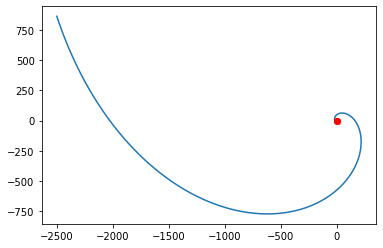

In [10]:
y0 = [
    1.2,
    0,
    -1.05,
    0
]

for nu in [0, 0.1, 1]:

  t, [x, vx, y, vy] = rk_dp(a, b, 1, 1e-6, 1e-12, y0)
  plt.plot(x, y)
  plt.plot(-mu, 0, 'ro')
  plt.plot(mubar, 0, 'ro')  
  plt.show()

In [11]:
a = 0
b = 20

In [12]:
nu = 0
t, [x, vx, y, vy] = rk_dp(a, b, 1, 1e-6, 1e-12, y0)

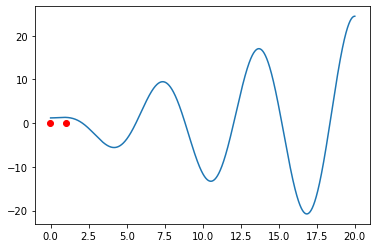

In [13]:
plt.plot(t, x)
plt.plot(-mu, 0, 'ro')
plt.plot(mubar, 0, 'ro')  
plt.show()

# Классический метод Рунге-Кутты

In [14]:
def rk_solve(a, b, h, y0):
  
  n = int(np.ceil((b-a)/h))
  t = np.linspace(a, b, num=n)

  y = np.array([np.zeros(n) for i in range(len(y0))])
  y[:, 0] = y0

  k = np.array([np.zeros(4) for i in range(len(y0))])

  for i in range(n - 1):

    k[:, 0] = f(t[i], y[:, i])
    k[:, 1] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 0])
    k[:, 2] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 1])
    k[:, 3] = f(t[i] + h, y[:, i] + h * k[:, 2])

    y[:, i+1] = y[:, i] + 1/6 * h * np.sum(k, axis=1)

  return t, y

In [15]:
h = 0.001

In [16]:
%time t, [x, vx, y, vy] = rk_solve(a, b, h, y0)

CPU times: user 1.13 s, sys: 160 ms, total: 1.29 s
Wall time: 1.12 s


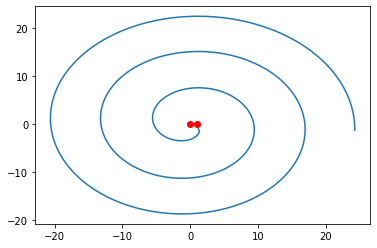

In [17]:
plt.plot(x, y)
plt.plot(-mu, 0, 'ro')
plt.plot(mubar, 0, 'ro')